# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Implementation of Optimal F

We saw that Kelly criterion has the following disadvantages:
1. The distribution of returns is reduced to binary values.
2. The volatility of the returns is ignored while calculating the trade size.

These limitations of Kelly criterion are overcome by using the optimal f method. The method involves maximising the cumulative holding period return over different trade sizes.

You will perform the following steps:

1. [Read the Data](#read)
2. [Calculate Cumulative Returns](#calc)
3. [Calculate Optimal F](#strategy_logic)
4. [Visualise Optimal F](#vis)

## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Quantra function to analyse the performance
import sys
sys.path.append("..")
from data_modules.position_sizing_quantra import performance_analysis

# Import matplotlib and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

<a id='read'></a>
## Read the Data

The index reversal strategy's trading signal, returns and portfolio value are read from a file named `strategy_data.csv`.

In [2]:
# Read the signal and cumulative returns of the index reversal strategy
strategy_df = pd.read_csv('../data_modules/strategy_data.csv',
                          index_col=0, parse_dates=True)

# Read `returns` column from `strategy_df`
returns = pd.DataFrame(strategy_df['returns'])

returns.head()

,returns
2005-01-03,-0.000000
2005-01-04,-0.000000
2005-01-05,-0.003537
2005-01-06,0.003296
2005-01-07,-0.000000


<a id='calc'></a>
## Calculate Cumulative Return

Cumulative return is calculated as $$\text{Cumulative return}={{(x_{1} + 1)(x_{2} + 1)\cdots (x_{n} + 1)}}$$where $${{x_{1}, x_{2},\cdots x_{n}}}$$ are individual returns from the strategy.

In [3]:
def cumulative_returns(returns):
    # Calculate cumulative return
    cm = (1 + returns).cumprod().iloc[-1]
    return cm[0]


cm = cumulative_returns(returns)
print("Cumulative return for the return series is: ",
      round(cm, 2))

Cumulative return for the return series is:  3.04


<a id='strategy_logic'></a>
## Calculate Optimal F
1. Calculate the leverages based on upper limit for account size. Here we take it as 40.
2. Calculate cumulative returns corresponding to different leverages.
3. Choose the leverage that maximises the cumulative return.

In [4]:
# Create dataframe for returns w.r.t. trade size
rets_df = pd.DataFrame(columns=['leverage', 'cum_rets'])

# Generate leverage
# We are taking upper limit for account size as 40
rets_df['leverage'] = np.linspace(0, 40, 101)

# Calculate returns
rets_df['cum_rets'] = rets_df['leverage'].apply(
    lambda leverage: cumulative_returns(returns * leverage))
rets_df.set_index(['leverage'], inplace=True)

optimal_f = rets_df.idxmax()[0]

print("Optimal f where returns are maximised: ", round(optimal_f, 2))

Optimal f where returns are maximised:  6.8


<a id='vis'></a>
## Visualise Optimal F

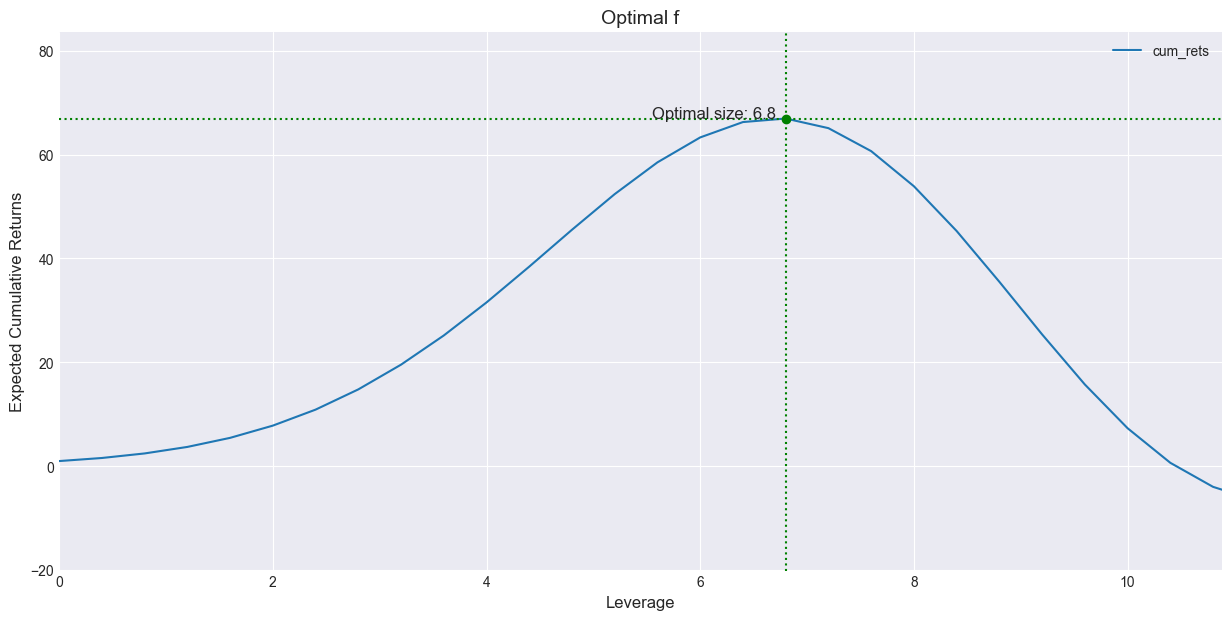

In [5]:
# Plot Optimal F
rets_df.plot(figsize=(15, 7))

# Set labels
plt.xlabel("Leverage", fontsize=12)
plt.ylabel("Expected Cumulative Returns", fontsize=12)
plt.title("Optimal f", fontsize=14)

# For better visualisation
# Defining x and y coordinates
x = optimal_f
y = rets_df.loc[optimal_f, 'cum_rets']

# Make changes to limits for better visualisation
plt.xlim(0, x * 1.60)
plt.ylim(y * (-0.30), y * 1.25)

# Mark max value for better visualisation
plt.plot(x, y, color='g', marker='o')
plt.axvline(x, color='g', linestyle=':')
plt.axhline(y, color='g', linestyle=':')


# Add text for optimal_f
plt.text(x-1.25, y+0.000010,
         f"Optimal size: {round(optimal_f, 2)}", fontsize=12);

From the graph above, we can see clearly, that initially the returns improve as the leverage increases. But after a leverage of 6.8, the returns begin to taper off. This implies we do not get any additional benefit of leverage after that point.

Therefore, we should use a leverage of 6.8.

## Tweak the Code
You can tweak the code in the following ways:

1. Use returns from a different strategy or a list of trades to find the optimal f.
2. Change the rules of the current trading strategy to see the effect on optimal f.
3. Find optimal f using a subset of the returns. Use the value obtained to backtest the strategy with rest of the returns. 

In the next unit we will discuss the inherent risk in Kelly criterion and optimal f. <br><br>